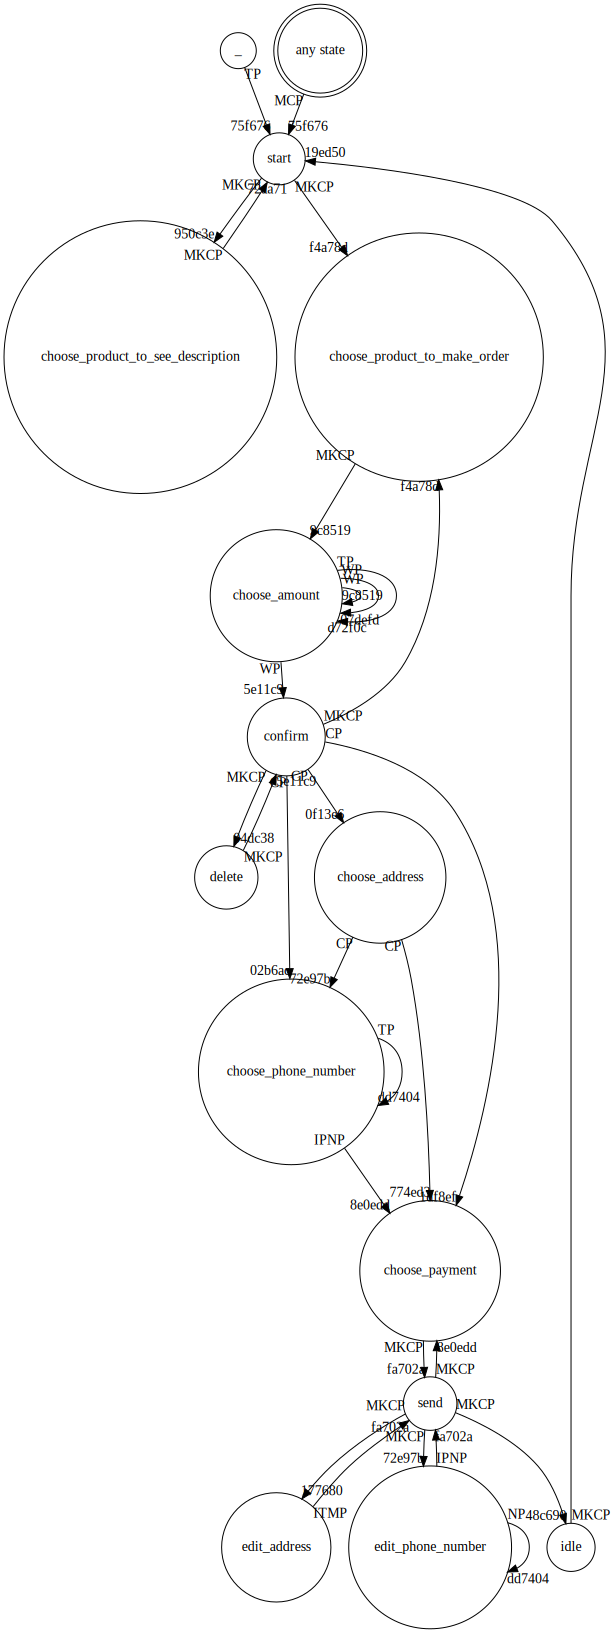

In [2]:
import json
from graphviz import Digraph

def _contractTagName(s):
    return "".join([l for l in s if l==l.upper()])

with open("../src/main/resources/transitions.json") as f:
    transitions = json.load(f)
    
# print(transitions["transitions"])
g = Digraph("G")
g.attr("node",shape="circle")

for c in transitions["correspondence"]:
    start_state,end_state,cond,corr = tuple(c)
    
    if start_state is not None and end_state is not None:
        pass
    elif start_state is None and end_state is not None:
        start_state = "any state"
        g.attr("node",shape="doublecircle")
        g.node(start_state)
        g.attr("node",shape="circle")
        
    g.edge(start_state,end_state,headlabel=corr["correspondence"][:6],taillabel=_contractTagName(cond["tag"]))

g